In [94]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from CoreFunctions import *
from RiskReturn import *
from PyPortfolio import *
from tqdm.auto import tqdm
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','^FTSE', '^NSEI'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


In [96]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [97]:

portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


In [98]:
a = global_minimum_variance(return_series=riskreturn_object.get_return_series(), periodicity='M')

In [99]:
semi_deviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

^FTSE    0.785866
^GSPC    0.729454
^NSEI    0.909762
dtype: float64

In [100]:
maximum_semideviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

(True, array([0.00000000e+00, 2.77555756e-17, 1.00000000e+00]))

In [109]:
gmv_weights = []

for resampled_returns in tqdm(range(5000)):

    rets = returns_monthly.sample(36, replace=True)
    gmv= maximum_sharpe_weights(rets, 'M')
    gmv_weights.append(gmv[1])


  0%|          | 0/5000 [00:00<?, ?it/s]


NameError: name 'maximum_sharpe_ratio' is not defined

In [103]:
df = pd.DataFrame(data=gmv_weights, columns = returns_monthly.columns)
df.hist?

Signature:
df.hist(
    column=None,
    by=None,
    grid=True,
    xlabelsize=None,
    xrot=None,
    ylabelsize=None,
    yrot=None,
    ax=None,
    sharex=False,
    sharey=False,
    figsize=None,
    layout=None,
    bins=10,
    backend=None,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : bool, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation

array([[<AxesSubplot:title={'center':'^FTSE'}>,
        <AxesSubplot:title={'center':'^GSPC'}>],
       [<AxesSubplot:title={'center':'^NSEI'}>, <AxesSubplot:>]],
      dtype=object)

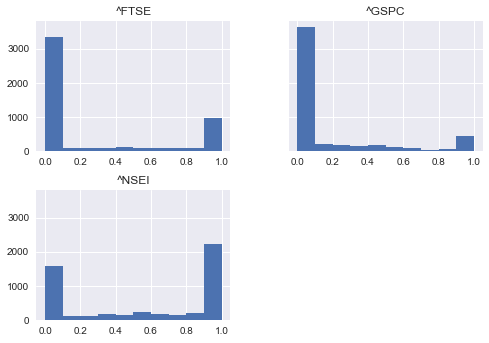

In [108]:
df.hist(sharey=True)